# Jupyter notebooks as potential content delivery tools

Jupyter notebooks look like an easy way to take people through a concept using code.

We can write the text content using markdown. So things like 
* Lists
* *text* highlighting, 
* Latex - $$c = \sqrt{a^2 + b^2}$$
* and such become fairly easy.

But most importantly, code is easily included:

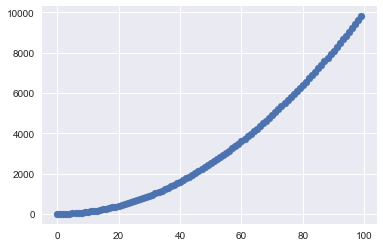

In [62]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = [i for i in range(100)]
y = [xi**2 for xi in x]
plt.scatter(x, y)

We can also make snippits of code interactive! 

In [66]:
import networkx as nx
from ipywidgets import interact

def random_lobster(n, k, p, m):
    g = nx.random_lobster(n, p, p / m)
    nx.draw(g)
    plt.show()

interact(random_lobster, n=(2,30), k=(1,10), p=(0.0, 1.0, 0.001),
         m={
             'm=1': 1,
             'm=5': 1,
             'Another option - m=7': 7,
         });

interactive(children=(IntSlider(value=16, description='n', max=30, min=2), IntSlider(value=5, description='k', max=10, min=1), FloatSlider(value=0.5, description='p', max=1.0, step=0.001), Dropdown(description='m', options={'m=1': 1, 'm=5': 1, 'Another option - m=7': 7}, value=1), Output()), _dom_classes=('widget-interact',))

We can show images, videos etc etc, all part of the same document

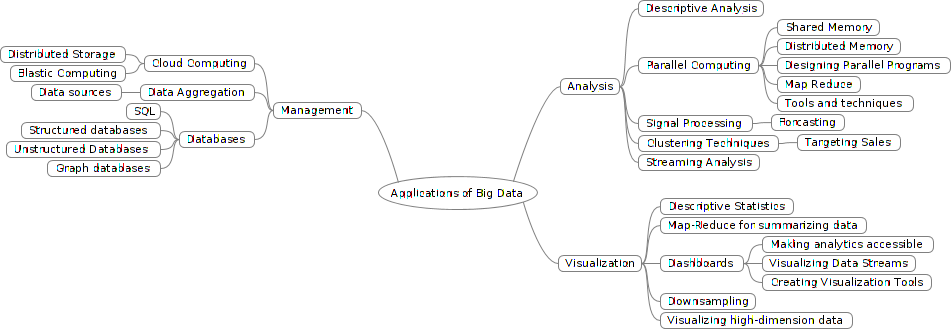

In [68]:
from IPython.display import Image
Image(filename='Domain Knowledge Map -  Big Data.png') 

And since it's hosted, users can access it from a web browser and have instant access to libraries and files on the server, eliminating the need for long installation instructions.

A notebook can also be saved as a static PDF or downloaded and run later. The code can be copied into a .py file for later use. All in all, they look to provide a fairly easy way to play around with data and share code/instructions.

# Here are some (edited) examples from the web

In [2]:
# For example, introducing classification with scikit learn (stolen from various examples)

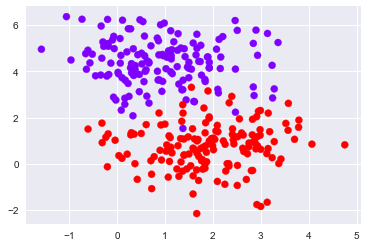

In [56]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=2,
                  random_state=0, cluster_std=1.0)
ys = y[:]
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

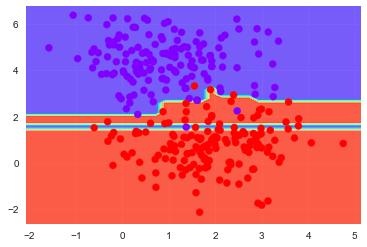

In [57]:
# Visualize some classification methods
clf = DecisionTreeClassifier(max_depth=15)
clf.fit(X, [int(yv) for yv in ys])

# Plot the output
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))

#Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
# else:
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='rainbow', alpha=.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

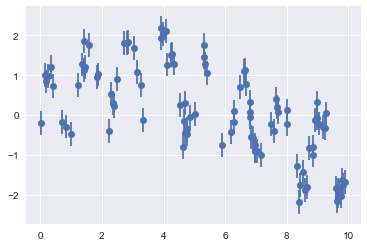

In [58]:
from sklearn.ensemble import RandomForestRegressor

x = 10 * np.random.rand(100)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * np.random.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

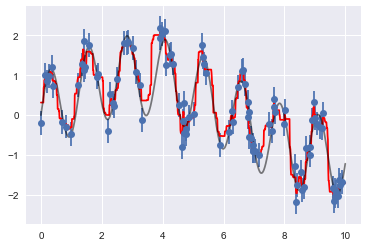

In [59]:
xfit = np.linspace(0, 10, 1000)
yfit = RandomForestRegressor(100).fit(x[:, None], y).predict(xfit[:, None])
ytrue = model(xfit, 0)

plt.errorbar(x, y, 0.3, fmt='o')
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

More examples:
http://nbviewer.jupyter.org/github/donnemartin/data-science-ipython-notebooks/blob/master/kaggle/titanic.ipynb
https://github.com/donnemartin/data-science-ipython-notebooks
https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebook